In [2]:
from torchvision import models

fcn = models.segmentation.fcn_resnet101(pretrained=True).eval()

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
import torch

!wget -nv https://static.independent.co.uk/s3fs-public/thumbnails/image/2018/04/10/19/pinyon-jay-bird.jpg -O bird.png
img = Image.open('bird.jpg')
plt.imshow(img); plt.show()

print(img.size)

'wget' is not recognized as an internal or external command,
operable program or batch file.


<Figure size 640x480 with 1 Axes>

(1885, 1414)


In [4]:
# Apply the transformations needed

import torchvision.transforms as T

trf = T.Compose([T.Resize(256),T.CenterCrop(224),T.ToTensor(),T.Normalize(mean = [0.485, 0.456, 0.406],std = [0.229, 0.224, 0.225])])
inp = trf(img).unsqueeze(0)



In [5]:
out = fcn(inp)['out']
print (out.shape)


torch.Size([1, 21, 224, 224])


In [6]:
import numpy as np
om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
print (om.shape)


(224, 224)


In [7]:
print (np.unique(om))


[0 3]


In [8]:
# Define the helper function

def decode_segmap(image, nc=21):

   

  label_colors = np.array([(0, 0, 0),  # 0=background

               # 1=aeroplane, 2=bicycle, 3=bird, 4=boat, 5=bottle

               (128, 0, 0), (0, 128, 0), (128, 128, 0), (0, 0, 128), (128, 0, 128),

               # 6=bus, 7=car, 8=cat, 9=chair, 10=cow

               (0, 128, 128), (128, 128, 128), (64, 0, 0), (192, 0, 0), (64, 128, 0),

               # 11=dining table, 12=dog, 13=horse, 14=motorbike, 15=person

               (192, 128, 0), (64, 0, 128), (192, 0, 128), (64, 128, 128), (192, 128, 128),

               # 16=potted plant, 17=sheep, 18=sofa, 19=train, 20=tv/monitor

               (0, 64, 0), (128, 64, 0), (0, 192, 0), (128, 192, 0), (0, 64, 128)])

 

  r = np.zeros_like(image).astype(np.uint8)

  g = np.zeros_like(image).astype(np.uint8)

  b = np.zeros_like(image).astype(np.uint8)

   

  for l in range(0, nc):

    idx = image == l

    r[idx] = label_colors[l, 0]

    g[idx] = label_colors[l, 1]

    b[idx] = label_colors[l, 2]

     

  rgb = np.stack([r, g, b], axis=2)

  return rgb


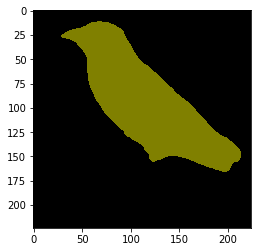

In [9]:
rgb = decode_segmap(om)
plt.imshow(rgb); plt.show()

In [10]:
def segment(net, path):
  img = Image.open(path)
  plt.imshow(img); plt.axis('off'); plt.show()
  # Comment the Resize and CenterCrop for better inference results
  trf = T.Compose([T.Resize(256), 
                   #T.CenterCrop(224), 
                   T.ToTensor(), 
                   T.Normalize(mean = [0.485, 0.456, 0.406], 
                               std = [0.229, 0.224, 0.225])])
  inp = trf(img).unsqueeze(0)
  out = net(inp)['out']
  om = torch.argmax(out.squeeze(), dim=0).detach().cpu().numpy()
  rgb = decode_segmap(om)
  plt.imshow(rgb); plt.axis('off'); plt.show()

'wget' is not recognized as an internal or external command,
operable program or batch file.


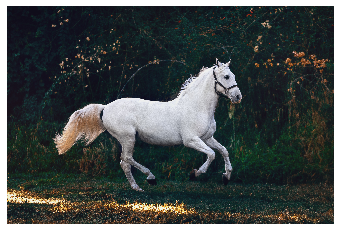

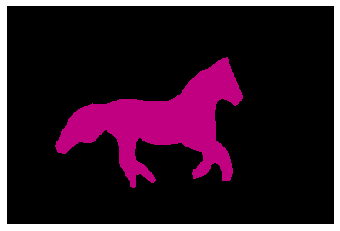

In [11]:
!wget -nv https://images.pexels.com/photos/1996333/pexels-photo-1996333.jpeg -O horse.png
segment(fcn, './horse.jpeg')

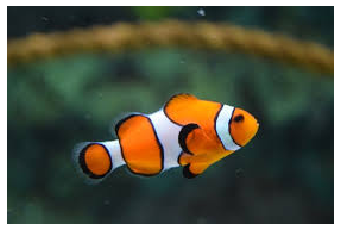

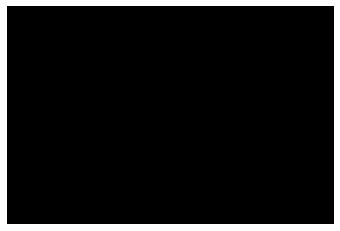

In [12]:
#!wget -nv https://images.pexels.com/photos/1996333/pexels-photo-1996333.jpeg -O horse.png
segment(fcn, './Fish.jpg')

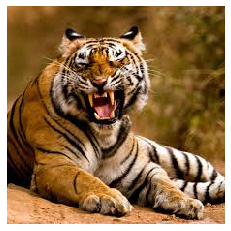

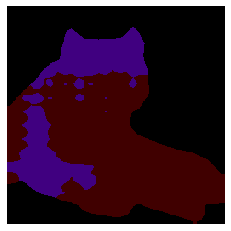

In [13]:
segment(fcn, './Tiger.jpg')

Deeplab by google

In [14]:
dlab = models.segmentation.deeplabv3_resnet101(pretrained=1).eval()

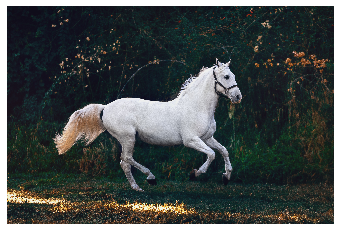

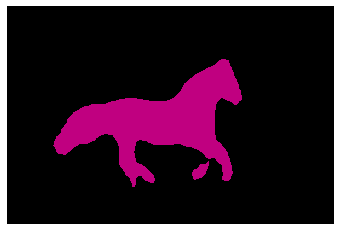

In [15]:
segment(dlab, './horse.jpeg')


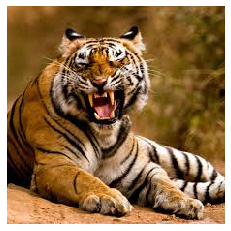

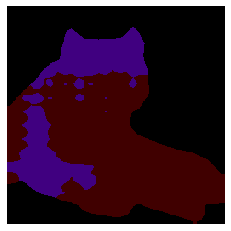

In [16]:
segment(fcn, './Tiger.jpg')